# Regression (Chapter 6)

This module focuses on a particular class of supervised machine learning: regression, where we are trying to discover relationships between variables in order to predict continuous quantities. Neelima gave you an introduction to linear regression, logistic regression, and how to use scikit-learn to accomplish both tasks. Content for this module:
* linear least-squares 
* non-linear regression models
* penalized regression models
* constrained regression

Resources:

1. Gander, Gander and Kwok (2014), Scientific Computing: An introduction using Maple and MATLAB, Springer, https://www.springer.com/us/book/9783319043241
2. Kuhn and Johnson (2013), Applied Predictive Modeling, Springer
https://www.springer.com/us/book/9781461468486

# Linear regression  (Section 6.2)

For samples with $D$ features, linear regression attempts to fit a $D$-dimensional hyperplane to the data.

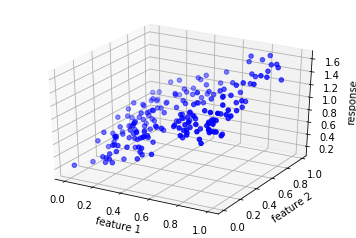

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

n = 200
x = np.random.rand(n,1) # feature 1
y = np.random.rand(n,1) # feature 2
z = x + 0.5*y + 0.1*np.random.randn(n,1) + 0.2 # response variable, z(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
_ = ax.set_zlabel('response')

Specifically, we are trying to find coefficients $a_0 + a_1, a_2, \ldots, a_D$ so that the hyperplane

\begin{align}
 z(x_1,x_2,\ldots,x_D) = a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_D x_D
\end{align}

models the response variable. (note, this is the generalized form of equation (6.2) in textbook).  Suppose we have $N$ samples, each with $D$ features, $\vec{x}_i = [{x_i}_1,{x_i}_2,\ldots,{x_i}_D],\, i= 1,\ldots N$. Then the hope, is that 

\begin{align}
  z({x_i}_1,{x_i}_2,\ldots,{x_i}_D) \approx y_i,\quad \text{for } i = 1,\ldots, N
\end{align}

This gives rise to an over-determined system of equations:

\begin{align}
  a_0 + a_1 x_{11} + a_2 x_{12} + \cdots + a_D x_{1D} &\approx y_1\\
  a_0 + a_1 x_{21} + a_2 x_{22} + \cdots + a_D x_{2D} &\approx y_2\\
    &\vdots \\
  a_0 + a_1 x_{N1} + a_2 x_{N2} + \cdots + a_D x_{ND} &\approx y_N\\
\end{align}

This is more easily expressed in matrix form, $X\,a = y$,

\begin{align}
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D}\\
1 & x_{21} & x_{22} & \cdots & x_{2D}\\
1 & x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & X_{x2} & \cdots & x_{ND}
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1 \\
\vdots\\
a_D
\end{bmatrix}
\approx
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_N
\end{bmatrix}
\end{align}

Here, the matrix $X$ is of size: $N \times (D+1)$, the vector of coefficients we seek is of size $(D+1)\times 1$, the right-hand side vector is of size $N \times 1$.  Here, we are imagining that $N \gg D$.  How do we solve the overdetermined system?

Well, it turns out we can't exactly most of the time, i.e., we can not find $a$ such that $X\,a =y$.  There is always some mismatch, a residual: $r = X\,a - y$.  We want to minimize this residual, for example, minimize $\|r\|^2_2 = \|X\,a - y\|^2_2$, i.e.,

$$ \min \|X\,a - y \|^2_2 = \min \left( \sum_{i = 1}^N  (X\,a - y)_i^2 \right) $$

### Theorem

If $X^T (X\,a - y) = 0$, then $a$ solves the linear least squares problem, i.e. $a$ minimizes $\|X\,a - y\|_2^2$

Proof: Let $c$ be any vector of size $(D+1)\times 1$.  Then $X(a+c) - y = X\,a -y + X\,c $, and

\begin{align}
\|X(a+c) - y\|_2^2 &= \left( X\,a -y + X\,c \right)^T \left(X\,a -y + X\,c \right) \\
&= (X\,a - y)^T (X\,a -y) + 2 (X\,c)^T(X\,a - y) + (X\,c)^T (X\,c) \\
&= \|X\,a - y\|_2^2 + 2c^T X^T (X\,a - y) + \|X\,c\|_2^2
\end{align}

If $X^T (X\,a - y) = 0$, then
\begin{align}
\|X(a+c) - y\|_2^2 = \|X\,a - y\|_2^2 + \|X\,c\|_2^2
\end{align}

Hence, for every $c$, we have 
\begin{align}
\|X(a+c) - y\|_2^2 \ge  \|X\,a - y\|_2^2
\end{align}

so $a$ must minimize $\|X\,a - y\|_2^2$ as required. 

The equation $X^T(X\,a - y) = 0$ is often written as

$$ X^T X\,a = X^T y, $$

called the normal equations.  There is a geometric interpretation: the vector in the range (column space of $X$) that lies closest to $y$ makes $X\,a - y$ perpendicular to the range.  Note, 
* the normal equations expresses the $N\times(D+1)$ linear least squares problem as a $(D+1)\times (D+1)$ linear system.
* the matrix $X^T X$ is symmetric
* $X^T X$ is singular . if and only if the columns of $X$ are linearly dependent, i.e., the rank of $X$ is less than $(D+1)$
* if $X^T X$ is non singular, then it is positive definite.

Observe that if $X^T X$ is non singular, then
$$ X^T X\,a = X^T y, $$
can be written as 
$$ a = (X^T X)^{-1} X^T y, $$

One sometimes defines the pseudo inverse,
$$ X^\dagger = (X^T X)^{-1} X^T.$$
Then, the least squares problem $X\,a = y$ has a solution $a = X^\dagger y$.


Numerically, one never forms the pseudo inverse to solve the least squares problem.  Rather, we rely on a useful factorization known as the QR factorization.  Every matrix has a QR factorization, $X = QR$, where $Q$ is an orthogonal matrix, and $R$ is upper triangular.  For convenience, lets refer to
* $X$ as an $m \times n$ matrix
* $Q$ is an $m \times m$ matrix, whose columns are orthonormal to each other, i.e.:
    * $q_i \cdot q_j = 0$ if $i\neq j$
    * $q_i \cdot q_i = 1, \quad i=1,2,\ldots,m$
* $R$ is an $m \times n$ upper triangular matrix, i.e., $r_{ij} = 0$ if $i > j$.

Lets switch to a toy example where we have an over-determined system, and explore the QR factorization and least-squares solution.  We will return to regression shortly. Suppose we have two packages that we wish to ship.  We measure the weight of these two packages in the office.  Package $A$ measures in at 2 pounds, package $B$ measures in at 5 pounds.  At the distribution site however, the two packages are weighed together, and the joint weight is reported at 8 pounds.  Use a least-squares solution to find a best estimate for the weight of each package.

In [3]:
import numpy as np
X = np.array( [ [1,0], [0,1], [1,1]])
print("our matrix X:")
print(X)
y = np.array( [[2],[5],[8]])
print("our target y:")
print(y)

our matrix X:
[[1 0]
 [0 1]
 [1 1]]
our target y:
[[2]
 [5]
 [8]]


In [4]:
[Q,R] = np.linalg.qr(X, mode = 'complete')
print("Lets check that Q*R = X, up to machine precision")
print(np.matmul(Q,R))

Lets check that Q*R = X, up to machine precision
[[ 1.00000000e+00 -1.10848874e-16]
 [ 0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]]


Lets check that $Q$ has orthonormal columns

In [5]:
print("matrix Q: ")
print(Q)
print("\nVarious inner products:")
print("q1^t q_1 = %g\n " % np.dot(Q[:,0],Q[:,0]) )
print("q1^t q_2 = %g \n" % np.dot(Q[:,0],Q[:,1]) )
print("q1^t q_3 = %g \n" % np.dot(Q[:,0],Q[:,2]) )
print("q2^t q_2 = %g \n" % np.dot(Q[:,1],Q[:,1]) )
print("q2^t q_3 = %g \n" % np.dot(Q[:,1],Q[:,2]) )
print("q3^t q_3 = %g " % np.dot(Q[:,2],Q[:,2]) )


matrix Q: 
[[-0.70710678  0.40824829 -0.57735027]
 [-0.         -0.81649658 -0.57735027]
 [-0.70710678 -0.40824829  0.57735027]]

Various inner products:
q1^t q_1 = 1
 
q1^t q_2 = 1.11022e-16 

q1^t q_3 = -1.11022e-16 

q2^t q_2 = 1 

q2^t q_3 = 5.55112e-17 

q3^t q_3 = 1 


Lets check that $R$ is upper triangular

In [6]:
print("R = ")
print(R)

R = 
[[-1.41421356 -0.70710678]
 [ 0.         -1.22474487]
 [ 0.          0.        ]]


There is a reduced factorization that is more useful. $ X = \hat{Q} \hat{R}$, where $\hat{Q}$ is an $m\times n$ matrix with orthonormal columns, and $\hat{R}$ is an $n\times n$ upper triangular matrix.

In [7]:
[Q,R] = np.linalg.qr(X, mode = 'reduced')
print("Q = ")
print(Q)
print("R = ")
print(R)
print("Lets check that Q*R = X, up to machine precision")
print(np.matmul(Q,R))

Q = 
[[-0.70710678  0.40824829]
 [-0.         -0.81649658]
 [-0.70710678 -0.40824829]]
R = 
[[-1.41421356 -0.70710678]
 [ 0.         -1.22474487]]
Lets check that Q*R = X, up to machine precision
[[ 1.00000000e+00 -1.10848874e-16]
 [ 0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]]


How do we use the $QR$ factorization to solve the normal equations?  Suppose we have $X = \hat{Q}\,\hat{R}$.  Observe:
\begin{align}
X^T X a &= X^T y \\
(\hat{Q}\,\hat{R})^T (\hat{Q}\,\hat{R})\, a &= (\hat{Q}\,\hat{R})^T y \\
\hat{R}^T \hat{Q}^T \hat{Q}\, \hat{R} \, a &= \hat{R}^T \hat{Q}^T y
\end{align}


If $\hat{R}^T$ exists, and observing that $\hat{Q}^T \hat{Q}$ gives an $n\times n$ identity matrix,
\begin{align}
&\implies \hat{R}^T \hat{R} \, a = \hat{R}^T \hat{Q}^T y \\
&\implies  \hat{R} \, a = \hat{Q}^T y
\end{align}

Lets use our toy example to solve our derived normal equations, simplified using the QR factorization.

In [8]:
from scipy.linalg import solve_triangular

x = solve_triangular(R,np.dot(np.transpose(Q),y)) # default is to solve upper triangular matrix.  to solve lower triangular, add flag lower=true
print("package weights: ")
print(x)

package weights: 
[[2.33333333]
 [5.33333333]]


Let's now visit regression, which is a linear least squares problem, using the diabetes dataset that is part of Scikit-learn.  

In [9]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

lets pick one feature to do a linear regression with.  (We will explore using more features shortly).  the third column is the body-mass-index, centered about the mean and scaled by the standard deviation.

Text(0,0.5,'diabetes progression after one year')

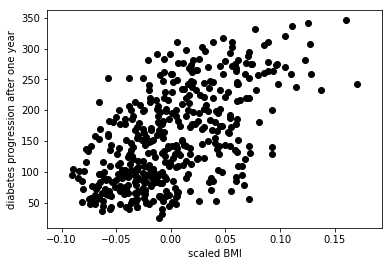

In [10]:
X = diabetes.data[:,np.newaxis,2]
y = diabetes.target[:]

import matplotlib.pyplot as plt

plt.scatter(X,y,color='black')
plt.xlabel('scaled BMI')
plt.ylabel('diabetes progression after one year')

Lets split the data into training and test sets.

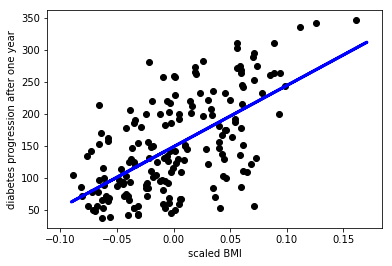

In [11]:
from sklearn.model_selection import train_test_split

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
              
from sklearn.linear_model import LinearRegression
# train regression model
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

# plot training data, overlay with fit
plt.scatter(X_train,y_train,color='black')
plt.plot(X_test,y_pred,color='blue',linewidth=3)
plt.xlabel('scaled BMI')
_ = plt.ylabel('diabetes progression after one year')

We should of course measure the mean squared error (MSE) and the $R^2$ value.  Denote the true target as $y$, the predicted target as $\hat{y}$.  Then,

\begin{align}
  \text{MSE} = \frac{1}{n} \sum_{i = 1}^n (y_{i} - \hat{y}_{i})^2.
\end{align}

What about the $R^2$ value? If the mean can be estimated or computed,

\begin{align}
  \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i,
\end{align}

then the $R^2$ value can be computed using 

\begin{align}
R^2 = 1 - \frac{\sum_{i = 1}^n (y_{i} - \hat{y}_{i})^2} {\sum_{i = 1}^n (y_{i} - \bar{y})^2}.
\end{align}

How do we interpret the $R^2$ value?
* $R^2 = 0$ indicates that the model explains none of the variability of the response data about the mean
* $R^2 = 1$ indicates that the model explains all the variability of response data about the mean

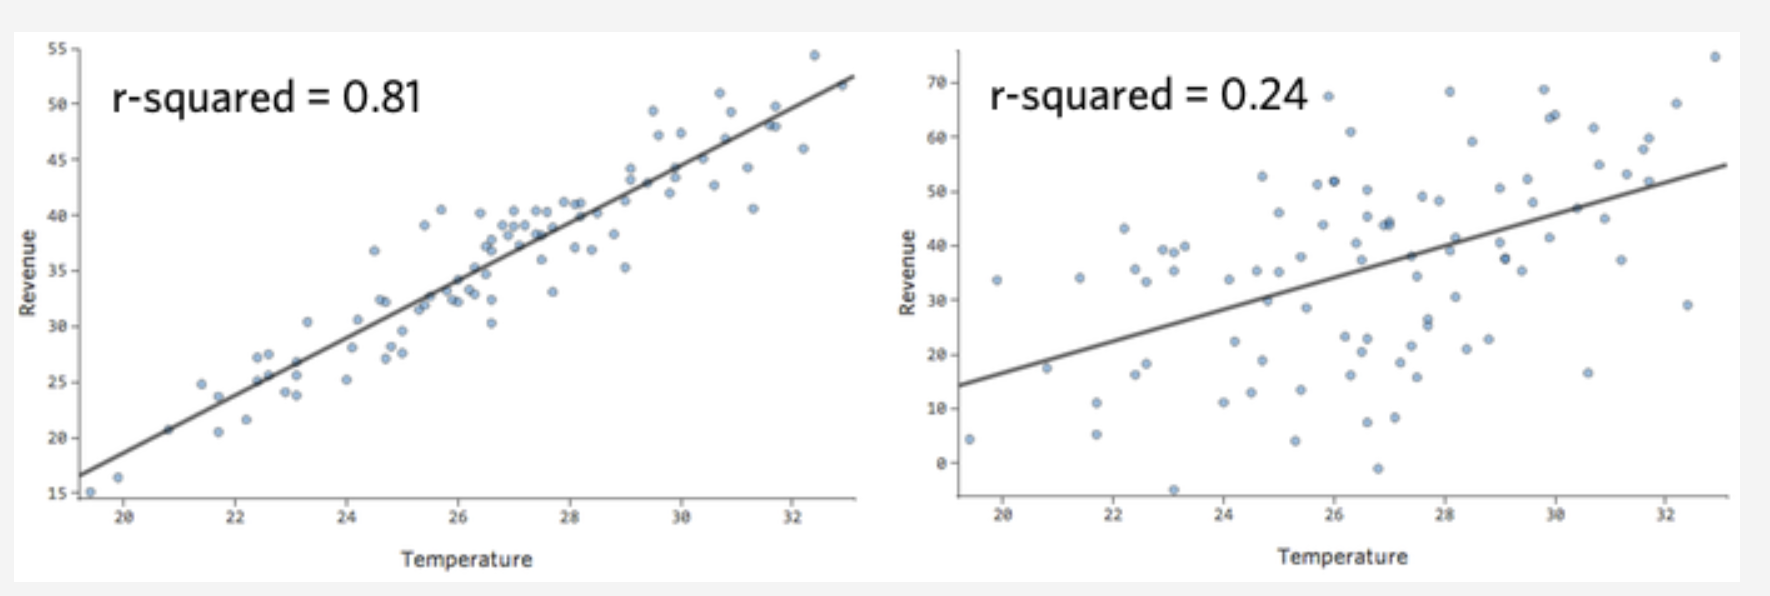

related game: http://guessthecorrelation.com/

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# R^2 score: 1 is perfect prediction
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 4094.70
R^2 score: 0.32


The coefficients of the blue line can be obtained using

In [13]:
print('Coefficients: %g '%  regr.coef_)
print('Intercept: %g '%  regr.intercept_)

Coefficients: 957.176 
Intercept: 148.342 


Lets recover these coefficients using our normal equations

In [14]:
A = np.ones( (X_train.size,2) )
A[:,np.newaxis,1]  = X_train

# find QR factorization
[Q,R] = np.linalg.qr(A, mode = 'reduced')

# solve normal equations
coeff = solve_triangular(R,np.dot(np.transpose(Q),y_train)) # default is to solve upper triangular matrix.  to solve lower triangular, add flag lower=true

# print coefficients
print("coefficients: ")
print(coeff)

coefficients: 
[148.34165359 957.17578443]


Voila!  They match.  We can also fit more features; hard to visualize when there are more than 2 fields.  Lets try: age and blood pressure

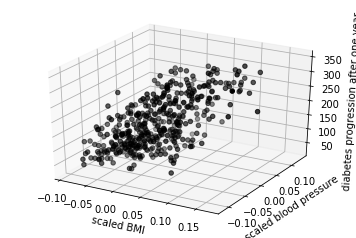

In [15]:
X = diabetes.data[:,[2,3]]
y = diabetes.target[:]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y,c='black',marker='o')
ax.set_xlabel('scaled BMI')
ax.set_ylabel('scaled blood pressure')
_ = ax.set_zlabel('diabetes progression after one year')



Let's split the data into training and test data, and fit a hyperplane to this data

Coefficients: 
[933.3811444 305.9057657]
Intercept: 156.217 
Mean squared error: 3779.43
R^2 score: 0.31


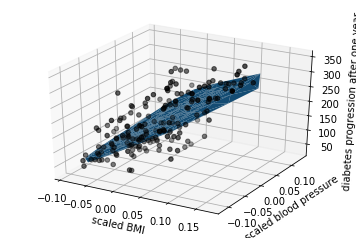

In [16]:
# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
              
# train regression model on training data
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],y_train,c='black',marker='o')
ax.plot_trisurf(X_test[:,0],X_test[:,1],y_pred) # plot hyperplane
ax.set_xlabel('scaled BMI')
ax.set_ylabel('scaled blood pressure')
_ = ax.set_zlabel('diabetes progression after one year')

print('Coefficients: ')
print(regr.coef_)
print('Intercept: %g '%  regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# R^2 score: 1 is perfect prediction
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Again, lets recover the hyperplane coefficients using our normal equations

In [17]:
A = np.ones( (X_train.shape[0],3) )
A[:,np.newaxis,[1,2]]  = X_train[:,np.newaxis,[0,1]]

# find QR factorization
[Q,R] = np.linalg.qr(A, mode = 'reduced')

# solve normal equations
coeff = solve_triangular(R,np.dot(np.transpose(Q),y_train)) # default is to solve upper triangular matrix.  to solve lower triangular, add flag lower=true

# print coefficients 
print("coefficients: ")
print(coeff)

coefficients: 
[156.21693002 933.3811444  305.9057657 ]


We can of course fit a hyperplane to all the features, though it is difficult to now visualize the 10-dimensional hyperplane. 

In [18]:
X = diabetes.data
y = diabetes.target[:]

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
              
# train regression model on training data
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)

print('Coefficients: ')
print(regr.coef_)
print('Intercept: %g '%  regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# R^2 score: 1 is perfect prediction
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
[  -15.40627466  -251.41110433   326.71480565   490.22269119
 -1199.15303028   842.00921972   266.5131721    207.96975034
   953.90900717    45.17137399]
Intercept: 154.873 
Mean squared error: 3043.59
R^2 score: 0.47


and again, using our normal equations:

In [19]:
A = np.ones( (X_train.shape[0],11) )
A[:,np.newaxis,range(1,11)]  = X_train[:,np.newaxis,range(10)]

# find QR factorization
[Q,R] = np.linalg.qr(A, mode = 'reduced')

# solve normal equations
coeff = solve_triangular(R,np.dot(np.transpose(Q),y_train)) # default is to solve upper triangular matrix.  to solve lower triangular, add flag lower=true

# print coefficients
print("coefficients: ")
print(coeff)

coefficients: 
[  154.87324363   -15.40627466  -251.41110433   326.71480565
   490.22269119 -1199.15303028   842.00921972   266.5131721
   207.96975034   953.90900717    45.17137399]


Going back to first principle allows you to fit more general functions to your data,

\begin{align}
y(\vec{x}) = a_1 f_1(\vec{x}) + a_2 f_2(\vec{x}) + \cdots + a_D f_D(\vec{x})
\end{align}

as long as we seek unknown coefficients that give a linear combination of these functions.  Examples of these more general functions include higher degree polynomials, periodic functions such as sines and cosines.

## Section 6.2.3: Feature Selection (Sparse Models)

If one has many features (predictors), there is a tendency to over-fit the data: one picks up noise in the system if there are features that are uninformative.    Feature selection seeks to select only the informative features while discarding non-informative ones.  The text introduces one approach known as penalization methods, where one penalizes the magnitude of coefficients of features.  Recall that in the least squares sense, we wish to minimize
$\|r\|^2_2 = \|X\,a - y\|^2_2$, i.e.,

$$ \min \|X\,a - y \|^2_2 = \min \left( \sum_{i = 1}^N  (X\,a - y)_i^2 \right) $$

Lasso Regression adds $L_1$ regularization to the minimization problem, that is, it adds a penalty equivalent to the sum of the absolute value of the coefficients

$$ \min \left(\|X\,a - y \|^2_2 + \alpha \|a\|_1\right) = \min \left(\left( \sum_{i = 1}^N  (X\,a - y)_i^2 \right) + \alpha \sum_{j=0}^{D} |a_j| \right)$$

Ridge Regression adds $L_2$ regularization to the minimization problem, that is, it adds a penalty equivalent to the sum of the squares of the coefficients

$$ \min \left(\|X\,a - y \|^2_2 + \alpha \|a\|_2^2\right) = \min \left(\left( \sum_{i = 1}^N  (X\,a - y)_i^2 \right) + \alpha \sum_{j=0}^{D} |a_j|^2 \right)$$

There are courses that cover numerical methods for solving these sort of optimization problems (MA 5630 in Spring 2019); we will not try to explain them here.  Instead, lets focus on one of these methods to better understand the role of the regularization parameter and why these penalization methods fall into the class of feature selection methods.

Lets use the diabetes data, all features, and apply Lasso Regression with various penalty coefficients, $\lambda$, and track how the coefficients of the hyperplane, the MSE and the $R^2$ values changes.  Note, if $\alpha = 0$ (no penalization), we recover exactly the linear regression.

In [27]:
X = diabetes.data
y = diabetes.target[:]

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

# test the following values of lambda
alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000, 10000]

# We'll store our data in a pandas data frame
import pandas as pd

#Initialize a dataframe to store the results:
col = ['MSE','R^2'] + ['a_%d'%i for i in range(11)]
ind = ['alpha = %g'%i for i in alpha]
       
results = pd.DataFrame(index=ind, columns=col)

for i in range(len(alpha)):
    # train regression model on training data
    regr = linear_model.Ridge(fit_intercept=True,alpha=alpha[i])
    regr.fit(X_train,y_train)

    y_pred = regr.predict(X_test)
    
    results.iloc[i,2] = regr.intercept_
    results.iloc[i,3:] = regr.coef_
    results.iloc[i,0] = mean_squared_error(y_test, y_pred)
    results.iloc[i,1] = r2_score(y_test, y_pred)


In [28]:
pd.options.display.float_format = '{:,.2g}'.format
results

,MSE,R^2,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10
alpha = 0.0001,3.1e+03,0.45,1.5e+02,6.7,-2.2e+02,6.3e+02,2.1e+02,-1.4e+03,8.5e+02,4.7e+02,3.6e+02,9.8e+02,87
alpha = 0.001,3.1e+03,0.46,1.5e+02,9.2,-2.2e+02,6.3e+02,2.1e+02,-1.1e+03,6.8e+02,3.7e+02,3.3e+02,8.9e+02,91
alpha = 0.01,3e+03,0.46,1.5e+02,18,-2.3e+02,6.2e+02,2.1e+02,-4.3e+02,1.5e+02,33,2e+02,6.1e+02,1e+02
alpha = 0.05,3e+03,0.46,1.5e+02,26,-2.2e+02,5.7e+02,2e+02,-1.2e+02,-60,-1.2e+02,1.5e+02,4.6e+02,1.2e+02
alpha = 0.1,3e+03,0.46,1.5e+02,32,-2e+02,5.2e+02,2e+02,-67,-80,-1.4e+02,1.4e+02,4.1e+02,1.3e+02
alpha = 0.5,3.3e+03,0.42,1.5e+02,43,-99,3.2e+02,1.5e+02,1.9,-39,-1.4e+02,1.2e+02,2.7e+02,1.2e+02
alpha = 1,3.6e+03,0.36,1.5e+02,41,-54,2.2e+02,1.2e+02,16,-13,-1.1e+02,1e+02,2e+02,1e+02
alpha = 10,5.1e+03,0.089,1.5e+02,11,-2.3,38,24,9.4,4.8,-24,25,38,24
alpha = 100,5.6e+03,-0.00067,1.5e+02,1.3,-0.11,4.1,2.7,1.2,0.69,-2.7,2.9,4.2,2.7
alpha = 1000,5.7e+03,-0.012,1.5e+02,0.14,-0.0092,0.42,0.27,0.12,0.071,-0.28,0.3,0.42,0.28


Exercise: 
* explore ridge regression instead of lasso regression
* based on a quick web search, is there a preference for which penalization method to use in the machine learning community?  in what cases?